Basically, under which class does the new data point fall into? K-NN helps in deciding that. The most noob model I've ever come across. It is so noob that he wasn't invited to SVM's party.

## K-NN is slightly different from the rest of ML models

<font size='4'>k-NN does not have a loss function that can be minimized during training. In fact, this algorithm is not trained at all. The only "training" that happens for k-NN, is memorising the data (creating a local copy), so that during prediction you can do a search and majority vote. Technically, no function is fitted to the data, and so, no optimization is done (it cannot be trained using gradient descent).</font>

In [1]:
from IPython.display import Image

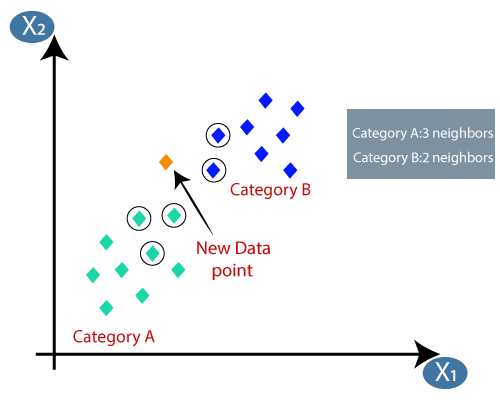

In [2]:
Image('CAPTURE.PNG', embed=True)

**STEP 1  :**  Choose the number K of neighbors (hyper parameter)

**STEP 2  :** Take K data points which are closest to the new data point 

**STEP 3  :** Among these K points, count the number of data points in each class

**STEP 4  :** Assign the new data point to the class where you counted the most neighbors in STEP 3

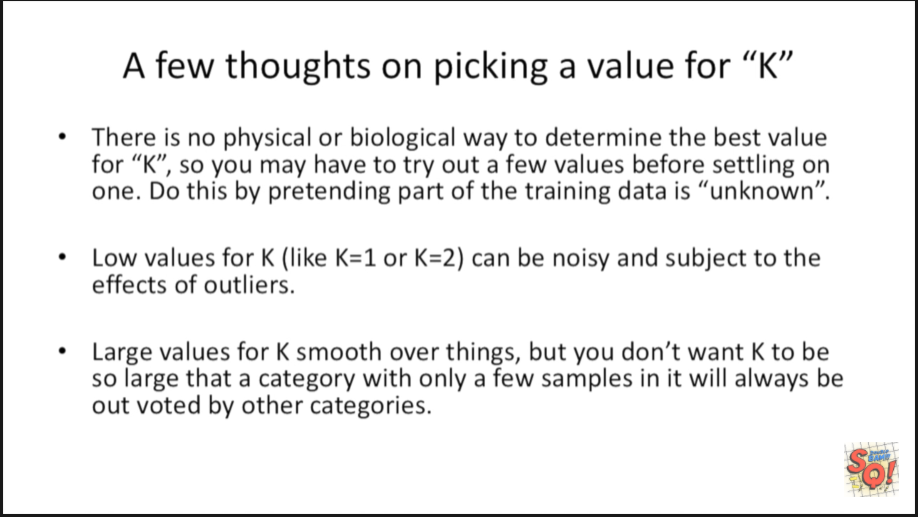

In [7]:
Image('Capture1.PNG', embed=True, width=600, height=500)

We can also use K-NN in regression setting i.e 

**STEP 1  :**  Choose the number K of neighbors (hyper parameter)

**STEP 2  :** Take K data points which are closest to the new data point 

**STEP 3  :** Take the average Y value of these K data points

**STEP 4  :** Assign the new data point the value of average calculated in previous step.

**NOTE OUTLIERS CAN GREATLY AFFECT K-NN MODEL.**

<font size='3'>The underlying algorithm remaining same, `sklearn.neighbors.KNearestNeighbors` can use 3 different algorithms to compute the nearest neighbors i.e :
1. KDtree
2. Balltree
3. Brute force
</font>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import utils
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier as KNN

In [48]:
df = pd.read_csv('Social_Network_Ads.csv', )
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.shape

(400, 3)

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
%matplotlib inline

[]

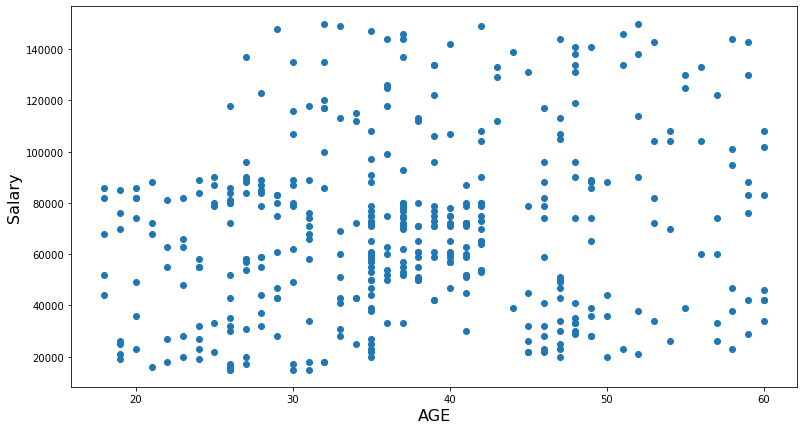

In [8]:
plt.figure(figsize=(13,7))
plt.scatter(df.Age, df.EstimatedSalary)
plt.xlabel('AGE', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.plot()

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


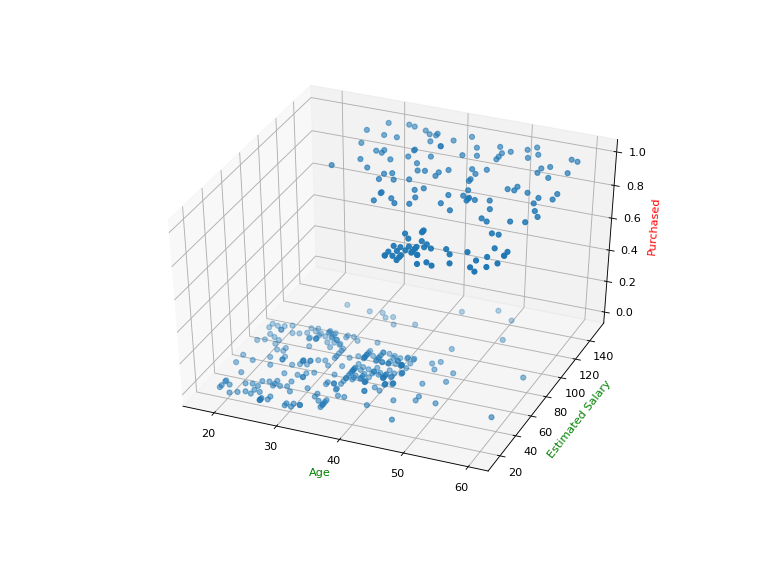

In [10]:
# 3D interactive scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df.Age, df.EstimatedSalary/1000, df.Purchased)
ax.set_xlabel('Age', c='green')
ax.set_ylabel('Estimated Salary',c='green')
ax.set_zlabel('Purchased', c='red')
plt.show()

In [49]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [50]:
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [51]:
# Feature Scaling
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

### Finding out optimum k

In [8]:
len(X_train), len(X_test)

(320, 80)

In [9]:
train_score = []
test_score = []
k_vals = []

for i in range(1,31):
    k_vals.append(i)
    k_nn = KNN(n_neighbors=i, p=2)
    k_nn.fit(X_train, Y_train)
    
    # append training score with k=i
    tr_score = k_nn.score(X_train, Y_train)
    train_score.append(tr_score)
    
    # append testing score with k=i
    te_score = k_nn.score(X_test, Y_test)
    test_score.append(te_score)

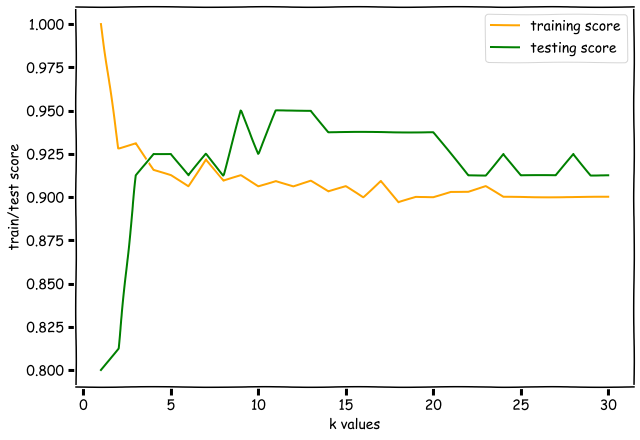

In [46]:
plt.xkcd(0.3,0,3)
plt.figure(figsize=(10,7))
plt.plot(k_vals, train_score, c='orange')
plt.plot(k_vals, test_score, c='green')
plt.xlabel('k values')
plt.ylabel('train/test score')
plt.legend(['training score','testing score'])
plt.show()

In [ ]:
# for k<4, over-fitting, bias variance balance at k~ 9-13

In [11]:
print('max test score', max(test_score), 'at k =', test_score.index(max(test_score))+1)

max test score 0.95 at k = 9


In [52]:
# Final Model or Best model
model = KNN(n_neighbors=9, p=2)
model.fit(X_train, Y_train)
# p=1 means manhattan distance 

KNeighborsClassifier(n_neighbors=9)

In [53]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

In [54]:
y_pred_probs = model.predict_proba(X_test)

y_pred = model.predict(X_test)

In [55]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [56]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("accuracy score :", accuracy_score(Y_test, y_pred))
# not bad at all. 
# accuracy score using different distance metrics at p=2, k=9:
# manhattan distance => 0.9125     sum(|x - y|)
# euclidean distance => 0.95       sqrt(sum((x - y)^2))
# chebyshev distance => 0.95       max(|x - y|)

[[51  3]
 [ 1 25]]
accuracy score : 0.95


In [57]:
cm_metrics = utils.cm_ratios(cm)

print('accuracy :', cm_metrics.accuracy)
print('misclassification_rate :', cm_metrics.misclassification_rate)
print('TPrate:', cm_metrics.TPrate, '(recall)')
print('TNrate:', cm_metrics.TNrate)
print('precision:', cm_metrics.precision)
print('FPrate:', cm_metrics.FPrate)
print('FNrate:', cm_metrics.FNrate)

# better than logistic regression :D

accuracy : 0.95
misclassification_rate : 0.05
TPrate: 0.9615384615384616 (recall)
TNrate: 0.9444444444444444
precision: 0.8928571428571429
FPrate: 0.05555555555555555
FNrate: 0.038461538461538464


In [19]:
%matplotlib inline

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


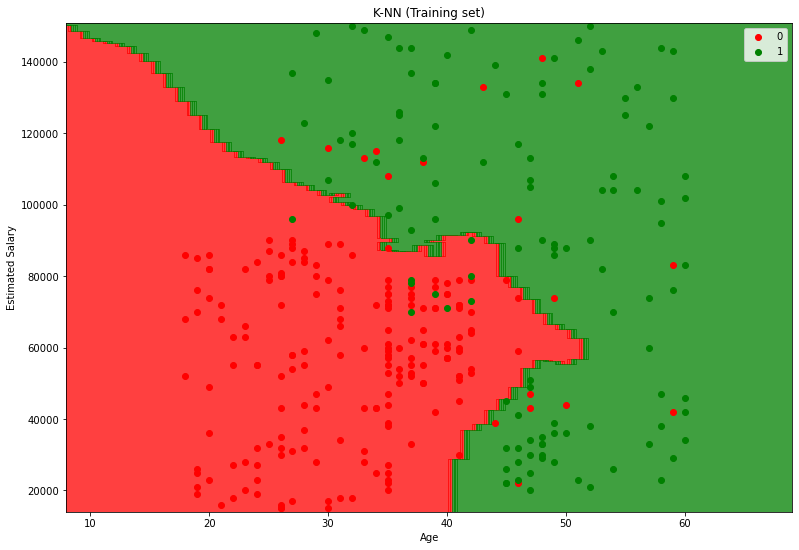

In [21]:
# from matplotlib.colors import ListedColormap
plt.figure(figsize=(13,9))
X_set, y_set = SC.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(SC.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


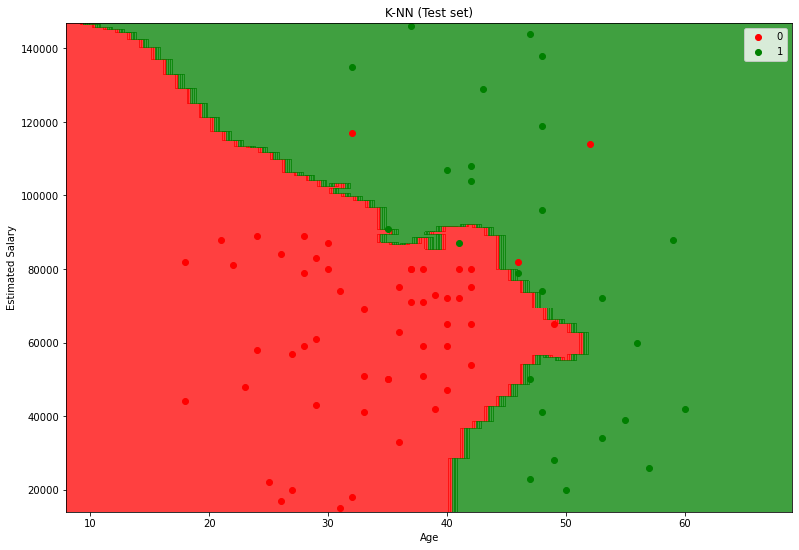

In [22]:
X_set, y_set = SC.inverse_transform(X_test), Y_test
plt.figure(figsize=(13,9))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(SC.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [8]:
# Precision & Recall
# https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/